In [46]:
import pandas as pd
import graphlab as gl
import numpy as np
import os,glob
from __future__ import unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.spatial.distance import cosine,euclidean
# color = 'black'
# mpl.rcParams['axes.labelcolor'] = color
# mpl.rcParams['axes.labelsize'] = 'x-large'
# mpl.rcParams['figure.figsize'] = (10,8)
# mpl.rcParams['xtick.color'] = color
# mpl.rcParams['ytick.color'] = color
# mpl.rcParams['ytick.labelsize'] = 'x-large'
# mpl.rcParams['xtick.labelsize'] = 'x-large'
# mpl.rcParams['axes.titlesize'] = 'xx-large'
# mpl.rcParams['text.color'] = color
# mpl.rcParams['text.usetex'] = False
# mpl.rcParams['legend.fontsize'] = 'x-large'
import seaborn
colors = seaborn.color_palette()

A newer version of GraphLab Create (v1.9) is available! Your current version is v1.8.5.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


This non-commercial license of GraphLab Create is assigned to jlorince@indiana.edu and will expire on May 03, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-05-11 16:09:42,431 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1462997381.log


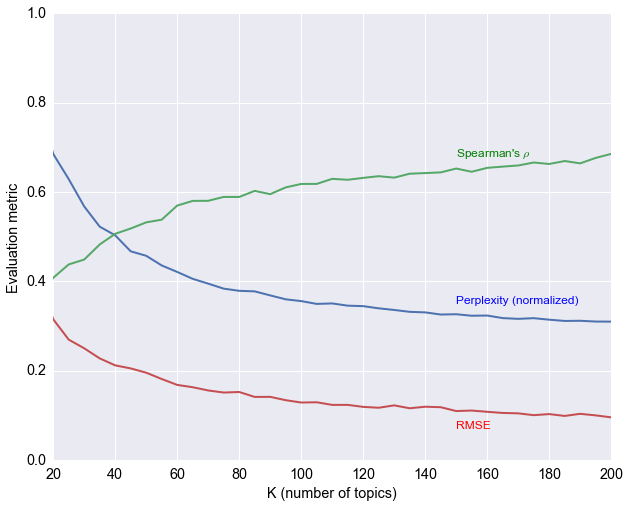

In [381]:
lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
cols = [col for col in lda_stats.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

handles,labels = ax.get_legend_handles_labels()
# l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
#                        "RMSE (prev)",r"Spearman's $\rho$ (split)", "RMSE (split)"])
# for text in l.get_texts():
#     text.set_color("black")
ax.annotate('Perplexity (normalized)',(150,.35),color='blue',fontsize='large')
ax.annotate(r"Spearman's $\rho$",(150,.68),color='green',fontsize='large')
#ax.annotate(r"Spearman's $\rho$ (split)",(150,.57),color=(0,191/255.,191/255.),fontsize='large')
ax.annotate("RMSE",(150,.07),color='red',fontsize='large')
#ax.annotate("RMSE (split)",(162,.13),color=(192/255.,0,192/255.),fontsize='large')


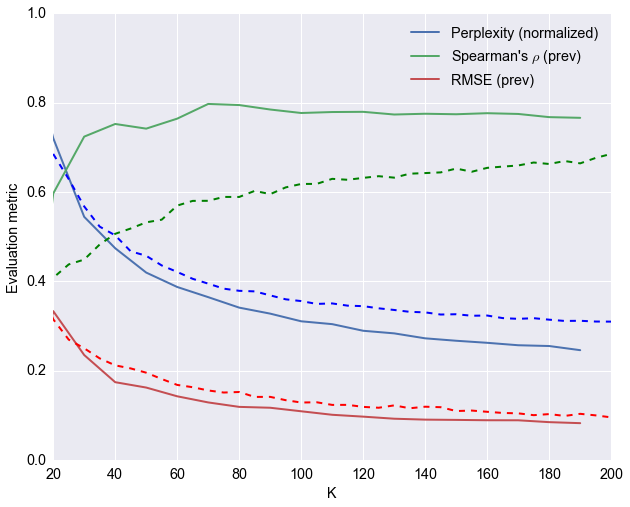

In [382]:
lda_stats_2 = pd.read_table('../GenreModeling/eval_results/artist_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats_2['perplexity'] = lda_stats_2['perplexity']/lda_stats_2['perplexity'].max()
cols = [col for col in lda_stats_2.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='--',color=['blue','green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")

In [383]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
nmf_summary = pd.read_table('../GenreModeling/eval_results/knn_nmf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
lda_summary_artists = pd.read_table('../GenreModeling/eval_results/knn_lda_artists.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

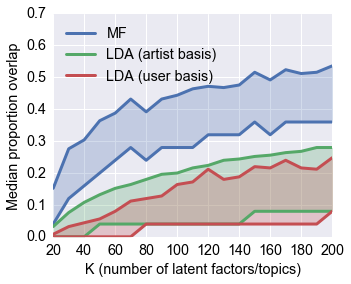

In [389]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# mf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
# mf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c=colors[0],label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
# mf_plot[250].plot(ax=ax,lw=3,c=colors[0])
# ax.fill_between(np.arange(20,201,10),mf_plot[25],mf_plot[250],color=colors[0],alpha=0.25)

nmf_plot = nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
nmf_plot[25].plot(ax=ax,ylim=(0,1),lw=3,c=colors[0],label='MF')#,color=['blue','green','red','cyan','magenta','yellow'])
nmf_plot[250].plot(ax=ax,lw=3,c=colors[0])
ax.fill_between(np.arange(20,201,10),nmf_plot[25],nmf_plot[250],color=colors[0],alpha=0.25)

lda_a_plot = lda_summary_artists.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_a_plot[25].plot(ax=ax,lw=3,c=colors[1],label='LDA (artist basis)')
lda_a_plot[250].plot(ax=ax,lw=3,c=colors[1])
ax.fill_between(np.arange(20,201,10),lda_a_plot[25],lda_a_plot[250],color=colors[1],alpha=0.25)

lda_plot = lda_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median')
lda_plot[25].plot(ax=ax,lw=3,c=colors[2],label='LDA (user basis)')
lda_plot[250].plot(ax=ax,lw=3,c=colors[2])
ax.fill_between(np.arange(20,201,10),lda_plot[25],lda_plot[250],color=colors[2],alpha=0.25)

ax.set_ylabel("Median proportion overlap")
ax.set_xlim(20,200)
ax.set_ylim(0,0.7)
ax.set_xlabel("K (number of latent factors/topics)")
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc='upper left')

fig.savefig('/Users/jaredlorince/Desktop/stability.pdf',bbox_inches='tight')

In [391]:
for i,d in enumerate((lda_summary,lda_summary_artists,nmf_summary)):
    break
    ax=d.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=2)
    l = ax.get_legend()
    for text in l.get_texts():
        text.set_color("black")
    t = l.get_title()
    t.set_text("KNN")
    t.set_color("black")
    t.set_fontsize("x-large")
    ax.set_ylabel("Median proportion overlap")
    if i ==2:
        ax.set_xlabel("K (number of latent factors)")
    else:
        ax.set_xlabel("K (number of topics)")
#    ax.set_title('"prev" method')
    #ax.grid(which='both')
    ax.set_xlim(20,200)

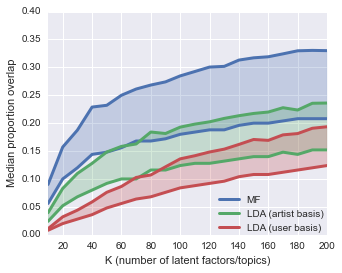

In [684]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

mf_poss = nmf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
mf_poss.plot(ax=ax,lw=3,label='MF',color=colors[0],ls='-')
mf_cons = nmf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
mf_cons.plot(ax=ax,lw=3,color=colors[0],ls='-')
ax.fill_between(np.arange(10,201,10),mf_cons,mf_poss,color=colors[0],alpha=0.25)

lda_a_cons = lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_cons.plot(ax=ax,lw=3,label='LDA (artist basis)',c=colors[1],ls='-')
lda_a_poss = lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_a_poss.plot(ax=ax,lw=3,c=colors[1],ls='-')
ax.fill_between(np.arange(10,201,10),lda_a_cons,lda_a_poss,color=colors[1],alpha=0.25)

lda_cons = lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median']
lda_cons.plot(ax=ax,lw=3,label='LDA (user basis)',ls='-',c=colors[2])
lda_poss = lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median']
lda_poss.plot(ax=ax,lw=3,ls='-',c=colors[2])
ax.fill_between(np.arange(10,201,10),lda_cons,lda_poss,color=colors[2],alpha=0.25)

ax.set_ylim(0,0.4)
handles,labels = ax.get_legend_handles_labels()
l = ax.legend([handles[0],handles[2],handles[4]],[labels[0],labels[2],labels[4]],loc=(0.6,-0.01))#'lower right')
#for text in l.get_texts():
#    text.set_color("black")
 
ax.set_xticks(np.arange(20,201,20))
#ax.grid()
ax.set_xlabel("K (number of latent factors/topics)")
ax.set_ylabel("Median proportion overlap")

# ax.annotate("LDA (user basis)",(80,0.035),color=colors[2],fontsize='x-large')
# ax.annotate("MF model",(41,0.32),color=colors[0],fontsize='x-large')
# ax.annotate("LDA (artist basis)",(35,0.2),color=colors[1],fontsize='x-large')

fig.savefig('/Users/jaredlorince/Desktop/fm_alignment.pdf',bbox_inches='tight')


In [29]:
artist_data = pd.read_table('../GenreModeling/data/artist_data',header=None,
                            names=['artist_id','artist_name','scrobbles','listeners'])

playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])
playcounts.sort(ascending=False)
playcounts = playcounts.reset_index(drop=True)

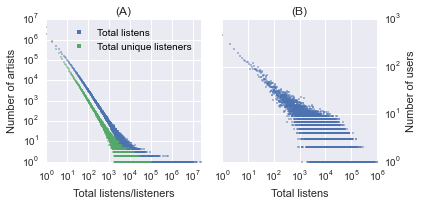

In [51]:
fig,axes = plt.subplots(1,2,figsize=(6,3))
ax = axes[0]
artist_data['scrobbles'].value_counts().sort_index().plot(marker='.',ax=ax,
                                                          ls='',loglog=True,label='Total listens',ms=3)
artist_data['listeners'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,ax=ax,label='Total unique listeners',ms=3)
ax.set_xlabel('Total listens/listeners')
ax.set_ylabel('Number of artists')
#ax.axvline(100,c='green',ls='--')
#ax.axvline(1000,c='blue',ls='--')
ax.set_title(r"(A)")
l = ax.legend(markerscale=3)
for text in l.get_texts():
    text.set_color("black")
#ax.grid()  

ax = axes[1]
playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True,ax=ax,ms=3)
ax.set_xlabel('Total listens')
ax.set_title("(B)")
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('Number of users')

plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/freq_dists.png',dpi=400,bbox_inches='tight')

In [152]:
files = glob.glob('../GenreModeling/manual_eval/results_old//*_log')
artist_ids = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_ids[int(line[1])] = line[0]
df_list = []
for f in files:
    df = pd.read_table(f,header=None,names=['ts','artist_a','artist_b','artist_c','ab_dist','bc_dist','agree'])
    iden = f.split('/')[-1].split('_')[0]
    df['iden'] = iden
    df_list.append(df)
raw_eval_data = pd.concat(df_list).drop_duplicates().dropna()
#print eval_data['iden'].value_counts()
#print eval_data['agree'].value_counts()
raw_eval_data = raw_eval_data[raw_eval_data['agree']!=-1]
raw_eval_data['artist_name_a'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_a']),axis=1)
raw_eval_data['artist_name_b'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_b']),axis=1)
raw_eval_data['artist_name_c'] = raw_eval_data.apply(lambda row: artist_ids.get(row['artist_c']),axis=1)
raw_eval_data['agree'] = raw_eval_data['agree'].apply(lambda x: 0.5 if x==2 else x)
def response_parse(row):
    if row['agree'] == 0.5:
        return '='
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['agree']==1.:
                response = 'c'
            elif row['agree'] == 0.:
                response = 'a'
        elif (row['ab_dist']<row['bc_dist']):
            if row['agree']==1.:
                response = 'a'
            elif row['agree'] == 0.:
                response = 'c'
    return response

def agree_parse(row):
    if row['response'] == '=':
        return 0.5
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['response']=='c':
                return 1
            elif row['response'] == 'a':
                return 0
        elif (row['ab_dist']<row['bc_dist']):
            if row['response']=='a':
                return 1
            elif row['response'] == 'c':
                return 0
            
raw_eval_data['response'] = raw_eval_data.apply(response_parse,axis=1)

from scipy.stats import entropy
from numpy.linalg import norm


def process(k,d,method='cosine',gamma=1.):
    processed = raw_eval_data.copy()
    artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
    if method=='jsd':
        def calc_dist(artist_a,artist_b):
            P = artist_features[artist_a]
            Q = artist_features[artist_b]
            _P = P / norm(P, ord=1)
            _Q = Q / norm(Q, ord=1)
            _M = 0.5 * (_P + _Q)
            return np.sqrt(0.5 * (entropy(_P, _M) + entropy(_Q, _M)))
    elif method=='euclidean':
        def calc_dist(artist_a,artist_b):
            return euclidean(artist_features[artist_a],artist_features[artist_b])**2           
    else:
        def calc_dist(artist_a,artist_b):
            return cosine(artist_features[artist_a],artist_features[artist_b])            
    processed['ab_dist'] = processed.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
    processed['bc_dist'] = processed.apply(lambda row: calc_dist(row['artist_b'],row['artist_c']),axis=1)
    #processed['dist_dif'] = np.clip(np.abs(processed['ab_dist']-processed['bc_dist']),0,1)
    processed['agree'] = processed.apply(agree_parse,axis=1)
    def luce(row):
        #ab = np.exp(max(0,1-row['ab_dist'])/gamma)
        #bc = np.exp(max(0,1-row['bc_dist'])/gamma)
        ab = max(0,1-row['ab_dist'])**gamma
        bc = max(0,1-row['bc_dist'])**gamma
        #ab = max(0.01,1- row['ab_dist'])
        #bc = max(0.01,1- row['bc_dist'])
        if ab==0. and bc==0.:
            return 0.5
        result = max([ab,bc]) / (ab+bc)
        return min(0.999,result)
                                          
    processed['luce'] = processed.apply(luce,axis=1)
    return processed

In [153]:
n = float(len(raw_eval_data[raw_eval_data['agree']!=0.5]))
def opt_func(gamma,k,d,method):
    eval_data = process(k,d,method=method,gamma=gamma[0])
    eval_data = eval_data[eval_data['agree']!=0.5]
    def calc_prob_old(row):
        if row['agree']==1:
            return row['luce']
        else:
            return 1 - row['luce']

    return -np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

from scipy.optimize import minimize
for d in ('lda_users','lda_artists','nmf','mf'):
    best = np.inf
    for method in ('euclidean','cosine','jsd'):
        if method=='jsd' and d=='nmf':
            continue
        else:
            for k in np.arange(10,201,10):
                result = minimize(opt_func,x0=[1.],args=(k,d,method),bounds=[(0.,100.)])
                print d,method,k,result.x,result.fun#,eval_data['agree'].sum()/n
                if result.fun < best: 
                    best = result.fun
                    best_method = method
                    best_k=k
                    best_gamma = result.x
    print '----------'
    print d,best_method,best_k,best_gamma
    print '----------'
                    

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lda_users euclidean 10 [ 0.] 1429.26948631
lda_users euclidean 20 [ 0.] 1429.26948631
lda_users euclidean 30 [ 0.] 1429.26948631
lda_users euclidean 40 [ 0.] 1429.26948631
lda_users euclidean 50 [ 0.] 1429.26948631
lda_users euclidean 60 [ 0.] 1429.26948631
lda_users euclidean 70 [ 0.] 1429.26948631
lda_users euclidean 80 [ 0.] 1429.26948631
lda_users euclidean 90 [ 1.71121335] 1388.5934776
lda_users euclidean 100 [ 1.74087283] 1396.83435089
lda_users euclidean 110 [ 1.97947758] 1435.8994122
lda_users euclidean 120 [ 1.80153218] 1428.4591744
lda_users euclidean 130 [ 1.57605929] 1392.87482005
lda_users euclidean 140 [ 2.70656552] 1412.76447576
lda_users euclidean 150 [ 2.43074375] 1379.00532509
lda_users euclidean 160 [ 2.22625045] 1392.13029056
lda_users euclidean 170 [ 3.19780503] 1382.70194139
lda_users euclidean 180 [ 5.44536527] 1360.51090081
lda_users euclidean 190 [ 4.75812039] 1343.88191096
lda_users euclidean 200 [ 4.16459089] 1381.2549098


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:74: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lda_users cosine 10 [ 0.01366313] 1424.07832053
lda_users cosine 20 [ 0.02227824] 1418.49846413
lda_users cosine 30 [ 0.01441804] 1426.41294769
lda_users cosine 40 [ 0.03894785] 1414.59955435
lda_users cosine 50 [ 0.08753972] 1387.0889548
lda_users cosine 60 [ 0.09376439] 1397.9625327
lda_users cosine 70 [ 0.17287077] 1360.50344263
lda_users cosine 80 [ 0.20729317] 1354.35166783
lda_users cosine 90 [ 0.27188034] 1317.09928843
lda_users cosine 100 [ 0.30948734] 1311.04475216
lda_users cosine 110 [ 0.29929989] 1308.16277068
lda_users cosine 120 [ 0.28654505] 1325.83425486
lda_users cosine 130 [ 0.32165565] 1316.09769374
lda_users cosine 140 [ 0.29398943] 1329.04645028
lda_users cosine 150 [ 0.32564366] 1313.6022659
lda_users cosine 160 [ 0.38395348] 1288.88560944
lda_users cosine 170 [ 0.45676836] 1258.53313159
lda_users cosine 180 [ 0.3810064] 1291.63515439
lda_users cosine 190 [ 0.4158604] 1277.03348252
lda_users cosine 200 [ 0.40697575] 1284.20162355


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


lda_users jsd 10 [ 0.22594335] 1419.65363963
lda_users jsd 20 [ 0.48735988] 1406.50759778
lda_users jsd 30 [ 0.56773358] 1409.12819276
lda_users jsd 40 [ 0.74845714] 1396.76462417
lda_users jsd 50 [ 1.3398896] 1350.65934033
lda_users jsd 60 [ 1.35264615] 1364.64091405
lda_users jsd 70 [ 1.67024971] 1338.90293689
lda_users jsd 80 [ 1.90641987] 1334.76214589
lda_users jsd 90 [ 2.16266159] 1311.45376333
lda_users jsd 100 [ 2.31766701] 1303.52077318
lda_users jsd 110 [ 2.49755396] 1288.61299729
lda_users jsd 120 [ 2.31355022] 1315.97661803
lda_users jsd 130 [ 2.57249351] 1302.79627858
lda_users jsd 140 [ 2.55687069] 1304.94083761


KeyboardInterrupt: 

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


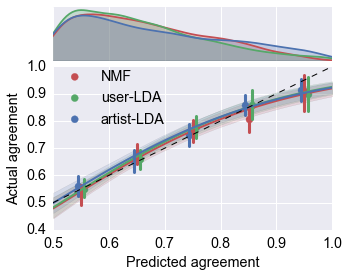

In [393]:
fig = plt.figure(figsize=(5,4)) 
gs = mpl.gridspec.GridSpec(2,1, height_ratios=[1,3],hspace=0.05) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.set_yticks([])
ax0.set_xticks(np.arange(0.5,1.,0.1))
ax0.set_xlim(0.5,1.)
ax0.set_ylim(0,4.)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

bins = bins = np.array([.55,.65,.75,.85,.95])

    #nmf 130 [ 1.0547198] 1249.91169716
eval_data = process(130,'nmf',gamma=1.0547198)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[2],line_kws={'lw':2,'ls':'-'},x_bins=bins,label='NMF')#, ci=None)
seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[2],shade=True,legend=None)
#log_prob_nmf = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

#lda_users 170 [ 0.45676836] 1258.53313159
eval_data = process(170,'lda_users',gamma=0.45676836)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[1],line_kws={'lw':2,'ls':'-'},x_bins=bins+0.006,label='user-LDA')#, ci=None)
seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[1],shade=True,legend=None)
#log_prob_lda_u = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()

#lda_artists 190 [ 0.75677536] 1200.5009065
eval_data = process(190,'lda_artists',gamma=.75677536)
eval_data = eval_data[eval_data['agree']!=0.5]
seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=True,ax=ax1,color=colors[0],line_kws={'lw':2,'ls':'-'},x_bins=bins-0.006,label='artist-LDA')#,ci=None)
seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[0],shade=True,legend=None)
#log_prob_lda_a = np.log(eval_data.apply(calc_prob_old,axis=1)).sum()


# eval_data = process(70,'mf')
# eval_data = eval_data[eval_data['agree']!=0.5]
# seaborn.regplot(x='luce',y='agree',data=eval_data,logistic=False,ax=ax1,color=colors[3],line_kws={'lw':3,'ls':'-'},x_bins=bins+0.003,label='MF',ci=None)
# seaborn.kdeplot(eval_data['luce'],ax=ax0,color=colors[3],shade=True,legend=None)
# log_prob_mf = np.log(eval_data.apply(calc_prob,axis=1)).sum()


ax1.plot(np.arange(0,1.,0.001),np.arange(0,1.,0.001),ls='--',lw=1,c='k')



#ax1.set_xlabel("|dist(A,B) - dist(A,C)|")
ax1.set_xlabel("Predicted agreement")
ax1.set_ylabel("Actual agreement")
ax1.set_ylim(0.4,1.)
ax1.set_xlim(0.5,1.)
#ax1.axhline(0.5,ls='--',c='k',lw=1)
ax1.legend(loc=(0.005,0.6))
#ax1.legend(loc='upper left')
#plt.tight_layout()
fig.savefig('/Users/jaredlorince/Desktop/human_eval.pdf',bbox_inches='tight')


In [375]:
eval_data = process(130,'nmf',gamma=1.0547198)
eval_data = eval_data[eval_data['agree']!=0.5]
print eval_data['agree'].sum() / len(eval_data)

eval_data = process(170,'lda_users',gamma=0.45676836)
eval_data = eval_data[eval_data['agree']!=0.5]
print eval_data['agree'].sum() / len(eval_data)

eval_data = process(190,'lda_artists',gamma=.75677536)
eval_data = eval_data[eval_data['agree']!=0.5]
print eval_data['agree'].sum() / len(eval_data)

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.66537342386
0.662463627546
0.689621726479


In [23]:
import numpy as np
x = np.random.random((10000,190))
from sklearn.metrics.pairwise import pairwise_distances

result = pairwise_distances(x,n_jobs=-1)

In [24]:
tri = np.triu(result)

In [25]:
tri

array([[  1.68587394e-07,   5.63589824e+00,   5.78384451e+00, ...,
          5.64538608e+00,   5.18356693e+00,   5.44173028e+00],
       [  0.00000000e+00,   2.92001932e-07,   5.85742989e+00, ...,
          5.87313380e+00,   5.88142856e+00,   5.56190742e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          5.65833248e+00,   5.65596817e+00,   5.84863783e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   5.70753023e+00,   5.65818903e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   5.63409951e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [308]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
#features = np.load("../GenreModeling/data/features/lda_artists/features_190.npy")[:20000]
features = np.load('lda_tests_artists/features_190.npy')
result = pairwise_distances(features,n_jobs=1,metric='cosine')
# fl_emp = np.tril(result,-1).flatten()
# dists_emp = fl_emp[np.nonzero(fl_emp)]
from scipy.spatial.distance import pdist
dists = pdist(features,metric='cosine')

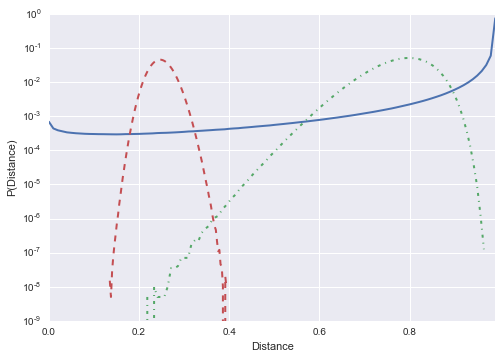

In [380]:
vals = np.array([   4342753,    2758452,    2434665,    2270920,    2119709,
           2053162,    1994882,    1959337,    1922705,    1902288,
           1892866,    1877421,    1874083,    1863723,    1855462,
           1848945,    1858331,    1880124,    1885812,    1897222,
           1909679,    1934086,    1953834,    1976167,    2017680,
           2040936,    2055491,    2083537,    2114419,    2150655,
           2194120,    2249111,    2272493,    2325087,    2367554,
           2416725,    2462583,    2521404,    2563512,    2604851,
           2695256,    2756445,    2803826,    2894250,    2966537,
           3045467,    3137236,    3217953,    3304613,    3385283,
           3506152,    3615489,    3728879,    3852848,    3975249,
           4116942,    4259982,    4393669,    4565893,    4735051,
           4915565,    5110184,    5321361,    5547708,    5769763,
           6032755,    6311907,    6592631,    6909088,    7272294,
           7651405,    8037407,    8455851,    8947049,    9463686,
          10038235,   10639318,   11368439,   12177132,   13061843,
          13993426,   15108871,   16321123,   17704801,   19340160,
          21231759,   23451017,   26002047,   29150575,   33027722,
          37754887,   43726235,   51365334,   61695357,   76175502,
          97892818,  133218950,  199894983,  374721579, 4697871943])
bins = np.array([  2.04281037e-14,   9.99999419e-03,   1.99999884e-02,
          2.99999826e-02,   3.99999768e-02,   4.99999709e-02,
          5.99999651e-02,   6.99999593e-02,   7.99999535e-02,
          8.99999477e-02,   9.99999419e-02,   1.09999936e-01,
          1.19999930e-01,   1.29999924e-01,   1.39999919e-01,
          1.49999913e-01,   1.59999907e-01,   1.69999901e-01,
          1.79999895e-01,   1.89999890e-01,   1.99999884e-01,
          2.09999878e-01,   2.19999872e-01,   2.29999866e-01,
          2.39999861e-01,   2.49999855e-01,   2.59999849e-01,
          2.69999843e-01,   2.79999837e-01,   2.89999831e-01,
          2.99999826e-01,   3.09999820e-01,   3.19999814e-01,
          3.29999808e-01,   3.39999802e-01,   3.49999797e-01,
          3.59999791e-01,   3.69999785e-01,   3.79999779e-01,
          3.89999773e-01,   3.99999768e-01,   4.09999762e-01,
          4.19999756e-01,   4.29999750e-01,   4.39999744e-01,
          4.49999738e-01,   4.59999733e-01,   4.69999727e-01,
          4.79999721e-01,   4.89999715e-01,   4.99999709e-01,
          5.09999704e-01,   5.19999698e-01,   5.29999692e-01,
          5.39999686e-01,   5.49999680e-01,   5.59999675e-01,
          5.69999669e-01,   5.79999663e-01,   5.89999657e-01,
          5.99999651e-01,   6.09999646e-01,   6.19999640e-01,
          6.29999634e-01,   6.39999628e-01,   6.49999622e-01,
          6.59999616e-01,   6.69999611e-01,   6.79999605e-01,
          6.89999599e-01,   6.99999593e-01,   7.09999587e-01,
          7.19999582e-01,   7.29999576e-01,   7.39999570e-01,
          7.49999564e-01,   7.59999558e-01,   7.69999553e-01,
          7.79999547e-01,   7.89999541e-01,   7.99999535e-01,
          8.09999529e-01,   8.19999523e-01,   8.29999518e-01,
          8.39999512e-01,   8.49999506e-01,   8.59999500e-01,
          8.69999494e-01,   8.79999489e-01,   8.89999483e-01,
          8.99999477e-01,   9.09999471e-01,   9.19999465e-01,
          9.29999460e-01,   9.39999454e-01,   9.49999448e-01,
          9.59999442e-01,   9.69999436e-01,   9.79999431e-01,
          9.89999425e-01,   9.99999419e-01])
fig,ax = plt.subplots(1,1)

vals =  vals / float(vals.sum())

ax.plot(bins[:-1],vals,lw=2)
ax.set_yscale('log')
ax.set_xlim(0,bins[-2])
ax.set_xlabel('Distance')
ax.set_ylabel('P(Distance)')
#ax.set_ylim(10e-5,1.)

vals,bins = np.histogram(dists_rand_dir,bins=100)
vals = vals / float(vals.sum())
ax.plot(bins[:-1],vals,ls='-.',lw=2)

vals,bins = np.histogram(dists_rand,bins=100)
vals = vals / float(vals.sum())
ax.plot(bins[:-1],vals,ls='--',lw=2)


In [370]:
dists_rand_dir = dists_random

In [5]:
import scipy.io as sio
sio.savemat('/Users/jaredlorince/Downloads/tSNE_matlab/cosine_dists.mat', {'vect':result})

In [371]:
# from scipy.spatial.distance import squareform
# r =  np.random.dirichlet(alpha=[50/190.]*190,size=20000)
# dists_rand_dir = pairwise_distances(r,n_jobs=-1,metric='cosine')
# dists_rand_dir = squareform(dists_rand_dir,checks=False)

r =  np.random.random((20000,190))
dists_rand = pairwise_distances(r,n_jobs=-1,metric='cosine')
dists_rand = squareform(dists_rand,checks=False)


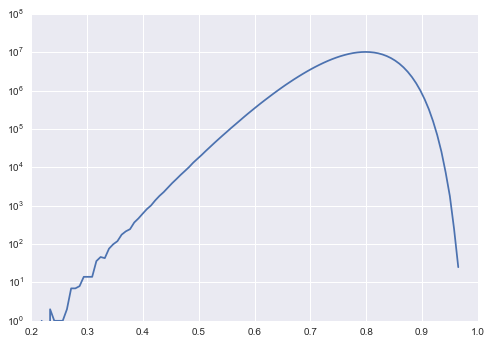

In [365]:
vals,bins = np.histogram(dists_random,bins=100)
vals = vals / vals.sum()
fig,ax = plt.subplots(1,1)
ax.plot(bins[:-1],vals)
ax.plot
ax.set_yscale('log')

In [ ]:
ax = seaborn.distplot(dists_emp,kde=False,norm_hist=False,bins=50,kde_kws={'bw':0.007})
#ax.set_yscale('log')
#ax = seaborn.kdeplot(dists_emp,bw=0.005,)
ax.set_yscale('log')
ax.set_xlim(0,1)

In [85]:
features.max(0)

array([ 0.23598061,  0.62847773,  0.7698547 ,  0.83668041,  0.4812351 ,
        0.9662668 ,  0.25039872,  0.554497  ,  0.62522175,  0.28256298,
        0.52768159,  0.99900445,  0.96743383,  0.95931906,  0.99744899,
        0.31920016,  0.39150853,  0.97912554,  0.99944421,  0.81775461,
        0.9391166 ,  0.98629485,  0.44662242,  0.8783836 ,  0.18196374,
        0.81111052,  0.98633198,  0.3006112 ,  0.99702628,  0.99666227,
        0.99909788,  0.24508334,  0.80856056,  0.99871549,  0.12232404,
        0.85888471,  0.9705161 ,  0.90982174,  0.78899746,  0.45379015,
        0.85553204,  0.18038659,  0.25905958,  0.23787008,  0.32064001,
        0.67222376,  0.94311474,  0.77993885,  0.18250722,  0.60282143,
        0.50776296,  0.38028483,  0.33574287,  0.85490907,  0.46737716,
        0.62268358,  0.19955762,  0.1198102 ,  0.16767746,  0.09690528,
        0.83606616,  0.67782268,  0.33062582,  0.84947898,  0.92400739,
        0.12450379,  0.25260842,  0.26672158,  0.97031342,  0.99

In [18]:
for x in np.vstack([nz[0],nz[1]]).T:
    print x
    break

[1 0]


In [53]:
import networkx as nx
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

N=1000
features = np.load("../GenreModeling/data/features/lda_artists/features_190.npy")[:N]
result = 1-pairwise_distances(features,n_jobs=-1,metric='cosine')
tri = np.tril(result,-1)
nz = np.nonzero(tri)
g = np.vstack([nz[0],nz[1]]).T

#for thresh in (0.05,0.1,0.2,0.3,0.4,0.5):
for thresh in(0.5,):

    G=nx.Graph()
    G.add_nodes_from(xrange(100))
    edges = [(x,y,{'weight':result[x,y]}) for x,y in g if result[x,y]>thresh]
    G.add_edges_from(edges)
    
    print thresh,nx.average_clustering(G,weight='weight'),len(edges)/float(N)

# g_rand = np.vstack([nz[0],nz[1]]).T
# np.random.shuffle(g_rand)
# G2=nx.Graph()
# G2.add_nodes_from(xrange(100))
# G2.add_edges_from([(x1,y1,{'weight':result[x,y]}) for (x,y),(x1,y1) in zip(g,g_rand)])

 0.5 0.460782561205 28.704


In [21]:
print nx.average_clustering(G,weight='weight')
print nx.average_clustering(G2,weight='weight')

0.724403004708
0.720363961707


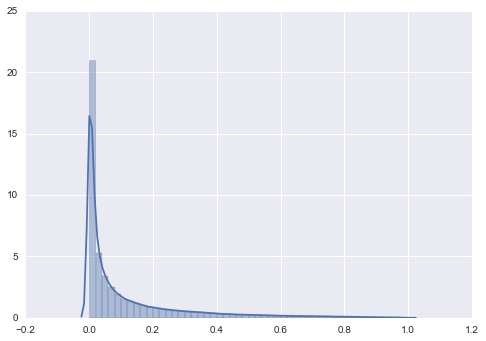

In [47]:
test = np.array([result[x,y] for x,y in g])
#test[test>0.].shape,test.shape
seaborn.distplot(test)

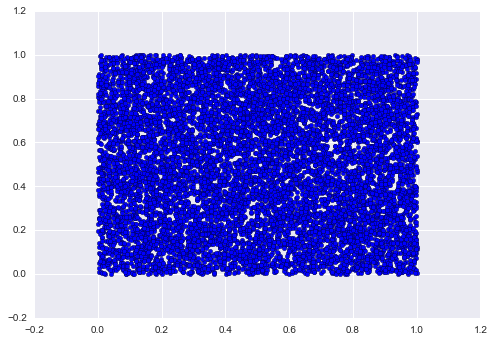

In [55]:
x = np.random.random((10000,2))
plt.scatter(x[:,0],x[:,1])

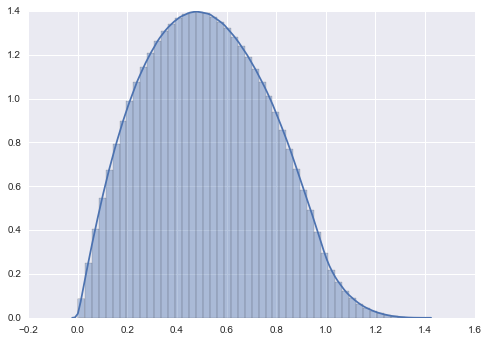

In [76]:
result = pairwise_distances(x,metric='euclidean')
fl = np.tril(result,-1).flatten()
dists = fl[np.nonzero(fl)]
seaborn.distplot(dists)

In [263]:
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)
X, labels_true = make_blobs(n_samples=5000, n_features=190,centers=20, cluster_std=1.,random_state=0)

pos = X+abs(X.min())
normed = pos/pos.sum(1,keepdims=True)


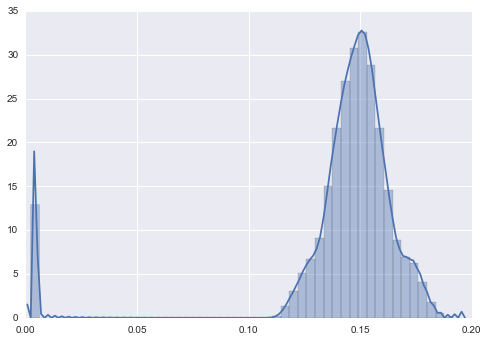

In [264]:
#seaborn.distplot
d = pairwise_distances(normed,metric='cosine')
tri = np.tril(d,-1)
seaborn.distplot(tri[np.nonzero(tri)].flatten())

In [208]:
np.random.random((40,2))*np.random.randint(40)

array([[ 35.72815492,   0.66998952],
       [  2.43302423,   2.915205  ],
       [ 31.86523863,  14.60322718],
       [  3.59580591,   3.22136391],
       [ 29.22346157,  35.05102499],
       [ 20.30846099,  13.0959585 ],
       [ 20.06185656,  33.73050607],
       [ 29.683415  ,   4.67167109],
       [  8.28383834,  16.9170068 ],
       [  4.56305191,  29.48254964],
       [  8.9609839 ,   9.76469798],
       [ 38.73347602,   8.57578066],
       [ 14.22268552,  37.87778784],
       [  6.19764257,  38.72744767],
       [ 14.37865201,  21.78893229],
       [ 28.58237957,  30.99259511],
       [ 31.46596452,  32.79893178],
       [ 31.5914224 ,  29.55910357],
       [ 18.42800947,  15.62003195],
       [ 32.13843559,   1.29533655],
       [ 24.17837378,   1.79568312],
       [ 12.02190456,   2.55975664],
       [ 37.06863394,  31.16458408],
       [  1.38923992,  17.12733742],
       [ 14.95351298,  29.75213514],
       [  4.48742505,  30.81463516],
       [ 28.48329571,  34.32976403],
 

In [147]:
def func(x):
    arr = x[x>0]
    if len(arr)>0:
        return arr.min()
    else:
        return np.nan

q=np.apply_along_axis(func,0,tri)

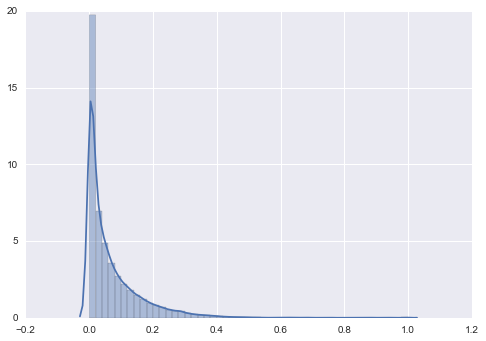

In [149]:
seaborn.distplot(q[~np.isnan(q)])

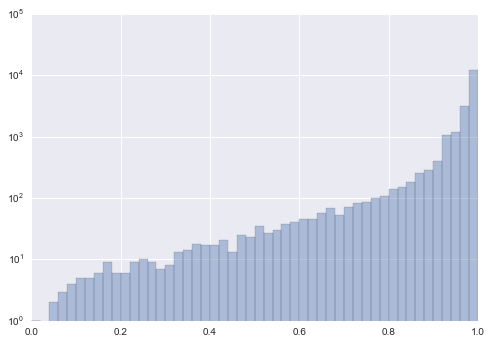

In [194]:
ax = seaborn.distplot(result[2],kde=False)
ax.set_yscale('log')

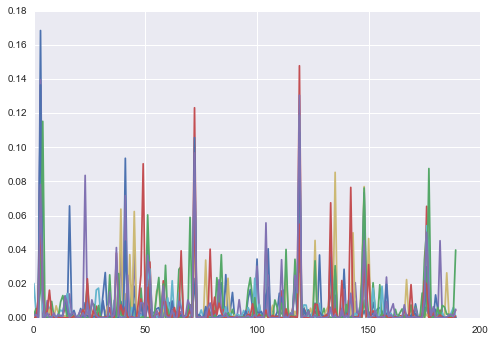

In [329]:
for f in features[:10]:
    plt.plot(f)

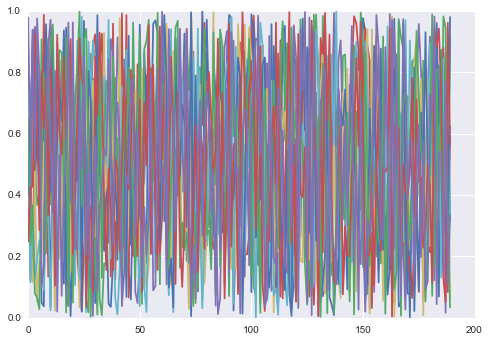

In [330]:
for f in r[:10]:
    plt.plot(f)

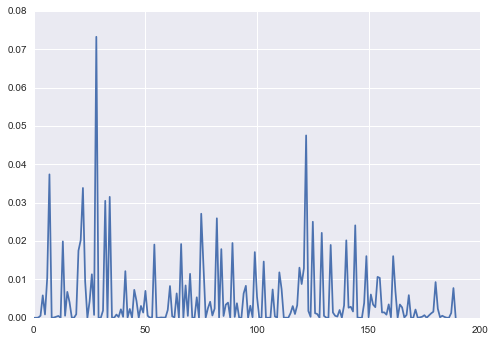

In [352]:
plt.plot(np.random.dirichlet(alpha=[50/190.]*190))

In [356]:
np.random.dirichlet(alpha=[50/190.]*190,size=10).shape

(10, 190)